In [1]:
import numpy as np
import pylab as plt

In [2]:
#abrimos las matrices de adyacencia por amistad.
Friendship1  = np.loadtxt('friendship1.txt')
Friendship2  = np.loadtxt('friendship2.txt') 
Friendship3  = np.loadtxt('friendship3(copia).txt')

In [3]:
F1=np.matrix(Friendship1)
F2=np.matrix(Friendship2)
F3=np.matrix(Friendship3)

In [4]:
imalos=[]
for i in range(160):
    if 1.0*(F1[i,:]==10).sum()==160:
        imalos.append(i)
    if 1.0*(F2[i,:]==10).sum()==160:
        imalos.append(i)
    if 1.0*(F3[i,:]==10).sum()==160:
        imalos.append(i)

In [5]:
160-len(list(set(imalos)))

134

In [6]:
imalos=list(set(imalos))
imalos.sort()

In [7]:
F1=np.delete(F1, imalos,0)
F1=np.delete(F1, imalos,1)

F2=np.delete(F2, imalos,0)
F2=np.delete(F2, imalos,1)

F3=np.delete(F3, imalos,0)
F3=np.delete(F3, imalos,1)

Chequeo

In [8]:
np.shape(F1),np.shape(F2),np.shape(F3)

((134, 134), (134, 134), (134, 134))

In [9]:
1.0*(F1==10).sum(), 1.0*(F2==10).sum(), 1.0*(F3==10).sum()

(0.0, 0.0, 0.0)

In [10]:
(1.0*(F1==0).sum()+1.0*(F1==1).sum()+1.0*(F1==2).sum(),1.0*(F2==0).sum()+1.0*(F2==1).sum()+1.0*(F2==2).sum(),
1.0*(F3==0).sum()+1.0*(F3==1).sum()+1.0*(F3==2).sum())

(17956.0, 17956.0, 17956.0)

In [11]:
134*134

17956

In [12]:
import networkx as nx

In [13]:
f1=F1.copy()
f1_sin_peso=(f1==0)==False
f1_sin_peso=np.where(f1_sin_peso==True,1,f1_sin_peso)
f2=F2.copy()
f2_sin_peso=(f2==0)==False
f2_sin_peso=np.where(f2_sin_peso==True,1,f2_sin_peso)
f3=F3.copy()
f3_sin_peso=(f3==0)==False
f3_sin_peso=np.where(f3_sin_peso==True,1,f3_sin_peso)


In [14]:
G1=nx.from_numpy_matrix(f1_sin_peso,create_using=nx.DiGraph())
G2=nx.from_numpy_matrix(f2_sin_peso,create_using=nx.DiGraph())
G3=nx.from_numpy_matrix(f3_sin_peso,create_using=nx.DiGraph())

SUSTANCIAS

In [15]:
alcohol= np.loadtxt('alcohol(copia).txt',dtype=int, usecols=(0,1,2))
alcohol=np.matrix(alcohol)
alcohol=np.delete(alcohol, imalos,0)


cannabis= np.loadtxt('cannabis(copia).txt',dtype=int, usecols=(0,1,2))
cannabis=np.matrix(cannabis)
cannabis=np.delete(cannabis, imalos,0)

tobacco = np.loadtxt('tobacco(copia).txt',dtype=int, usecols=(0,1,2))
tobacco =np.matrix(tobacco)
tobacco=np.delete(tobacco, imalos,0)

In [16]:
np.shape(alcohol),np.shape(cannabis),np.shape(tobacco)

((134, 3), (134, 3), (134, 3))

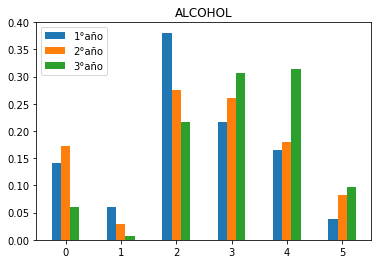

In [17]:
plt.hist(alcohol,[0,1,2,3,4,5,6] ,histtype='bar', rwidth=0.5,align='left', label=['1°año','2°año','3°año'], density=True)
plt.title('ALCOHOL')
plt.legend()
plt.show()

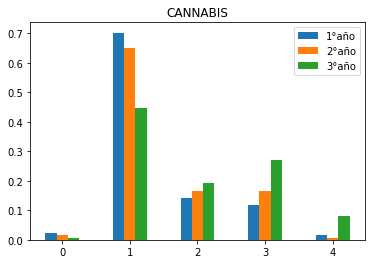

In [18]:
plt.hist(cannabis,[0,1,2,3,4,5] ,histtype='bar', rwidth=0.5,align='left', label=['1°año','2°año','3°año'], density=True)
plt.title("CANNABIS")
plt.legend()
plt.show()

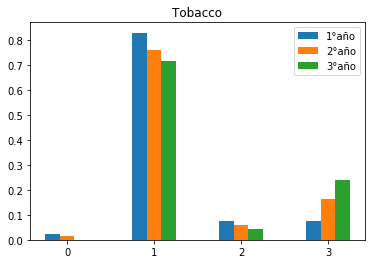

In [19]:
plt.hist(tobacco,[0,1,2,3,4] ,histtype='bar', rwidth=0.5,align='left', label=['1°año','2°año','3°año'], density=True)
plt.xticks([0,1,2,3])
plt.title("Tobacco")
plt.legend()
plt.show()

# Armo sets de enlaces que van a parar en 'tie' o 'no tie'.

In [20]:
set1_tie=set(G2.edges()).intersection(set(G1.edges()))
set1_notie=set(G2.edges()).difference(set(G1.edges()))
set2_tie=set(G3.edges()).intersection(set(G2.edges()))
set2_notie=set(G3.edges()).difference(set(G2.edges()))


# Le asigno consumos como atributos a los nodos

In [21]:
def AssignConsumption(G,A,C,T): #G:Grafo,A:Alcohol,C=Canabis,T:Tobaco
    for n in G.nodes:
        G.nodes[n]['Alcohol'] = np.float(A[n])
        G.nodes[n]['Cannabis'] = np.float(C[n])
        G.nodes[n]['Tobacco'] = np.float(T[n])
    return

In [22]:
AssignConsumption(G1,alcohol[:,0],cannabis[:,0],tobacco[:,0])
AssignConsumption(G2,alcohol[:,1],cannabis[:,1],tobacco[:,1])
AssignConsumption(G3,alcohol[:,2],cannabis[:,2],tobacco[:,2])


In [25]:
list(dict(G1.nodes('Tobacco')).values())

[2.0,
 1.0,
 3.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 3.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 2.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 3.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0]

In [39]:
no_info_tobacco=[]
no_info_alcohol=[]
no_info_cannabis=[]
for i in range(134):
    if list(dict(G1.nodes('Tobacco')).values())[i]==0:
        no_info_tobacco.append(i)
    if list(dict(G2.nodes('Tobacco')).values())[i]==0:
        no_info_tobacco.append(i)
    if list(dict(G3.nodes('Tobacco')).values())[i]==0:
        no_info_tobacco.append(i)
    if list(dict(G1.nodes('Cannabis')).values())[i]==0:
        no_info_tobacco.append(i)
    if list(dict(G2.nodes('Canna')).values())[i]==0:
        no_info_tobacco.append(i)
    if list(dict(G3.nodes('Tobacco')).values())[i]==0:
        no_info_tobacco.append(i)
no_info_tobacco=np.sort(list(set(no_info_tobacco)))

In [40]:
no_info_tobacco

array([ 14,  25,  41, 117, 133])